In [66]:
import pandas as pd

fear_greed_df = pd.read_csv('/content/fear_greed_index.csv')
historical_df = pd.read_csv('/content/historical_data.csv')

## Prepare data

### Subtask:
Clean and format the relevant columns in both DataFrames, including converting timestamp columns to datetime objects and ensuring date columns are in a consistent format for merging.


**Reasoning**:
Convert timestamp columns to datetime objects and extract the date part for both dataframes to prepare for merging.



In [67]:
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['timestamp'], unit='s', errors='coerce').dt.date
historical_df['date'] = pd.to_datetime(historical_df['Timestamp'], unit='s', errors='coerce').dt.date


## Merge data

### Subtask:
Merge the two DataFrames on their respective date columns to combine the trader performance data with the market sentiment data.


**Reasoning**:
Perform an inner merge of the two DataFrames on the 'date' column and display the first few rows and info of the merged DataFrame.



In [80]:
historical_df['date'] = pd.to_datetime(historical_df['Timestamp'], unit='s', errors='coerce').dt.date
historical_df_cleaned = historical_df.dropna(subset=['date'])
historical_df_cleaned['date'] = pd.to_datetime(historical_df_cleaned['date'])
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'])

merged_df = pd.merge(historical_df_cleaned, fear_greed_df, on='date', how='inner')
display(merged_df.head())
merged_df.info()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Account           0 non-null      object        
 1   Coin              0 non-null      object        
 2   Execution Price   0 non-null      float64       
 3   Size Tokens       0 non-null      float64       
 4   Size USD          0 non-null      float64       
 5   Side              0 non-null      object        
 6   Timestamp IST     0 non-null      object        
 7   Start Position    0 non-null      float64       
 8   Direction         0 non-null      object        
 9   Closed PnL        0 non-null      float64       
 10  Transaction Hash  0 non-null      object        
 11  Order ID          0 non-null      int64         
 12  Crossed           0 non-null      bool          
 13  Fee               0 non-null      float64       
 14  Trade ID          0 non-null      floa

**Reasoning**:
The merge resulted in an empty DataFrame, indicating there are no common dates between the two DataFrames after converting 'date' to datetime. The historical data has NaT values in the date column after the initial conversion, while the fear and greed index has valid dates. Need to filter out the rows with NaT dates from the historical data before merging.



In [70]:
historical_df_cleaned = historical_df.dropna(subset=['date'])
merged_df = pd.merge(historical_df_cleaned, fear_greed_df, on='date', how='inner')
display(merged_df.head())
merged_df.info()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Account           0 non-null      object        
 1   Coin              0 non-null      object        
 2   Execution Price   0 non-null      float64       
 3   Size Tokens       0 non-null      float64       
 4   Size USD          0 non-null      float64       
 5   Side              0 non-null      object        
 6   Timestamp IST     0 non-null      object        
 7   Start Position    0 non-null      float64       
 8   Direction         0 non-null      object        
 9   Closed PnL        0 non-null      float64       
 10  Transaction Hash  0 non-null      object        
 11  Order ID          0 non-null      int64         
 12  Crossed           0 non-null      bool          
 13  Fee               0 non-null      float64       
 14  Trade ID          0 non-null      floa

**Reasoning**:
The merge still results in an empty DataFrame. This suggests there are no overlapping dates between the historical data (after removing NaT) and the fear and greed index data within the available time range. Let's inspect the date ranges of both dataframes to confirm the issue.



In [71]:
print("Historical Data Date Range:")
print(historical_df_cleaned['date'].min())
print(historical_df_cleaned['date'].max())

print("\nFear and Greed Index Date Range:")
print(fear_greed_df['date'].min())
print(fear_greed_df['date'].max())

Historical Data Date Range:
NaT
NaT

Fear and Greed Index Date Range:
2018-02-01 00:00:00
2025-05-02 00:00:00


**Reasoning**:
The date range analysis confirms that the historical data's 'date' column is still full of NaT values even after dropping rows with NaT. This indicates the original conversion from timestamp to date resulted in NaT for all rows. Let's re-examine the 'Timestamp' column in the original historical_df and attempt the conversion to datetime and then date again, making sure the conversion unit and potential errors are handled correctly.



In [72]:
historical_df['date'] = pd.to_datetime(historical_df['Timestamp'], unit='s', errors='coerce').dt.date
historical_df_cleaned = historical_df.dropna(subset=['date'])
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'])

print("Historical Data Date Range (after re-cleaning):")
print(historical_df_cleaned['date'].min())
print(historical_df_cleaned['date'].max())

print("\nFear and Greed Index Date Range:")
print(fear_greed_df['date'].min())
print(fear_greed_df['date'].max())

merged_df = pd.merge(historical_df_cleaned, fear_greed_df, on='date', how='inner')
display(merged_df.head())
merged_df.info()

Historical Data Date Range (after re-cleaning):
NaT
NaT

Fear and Greed Index Date Range:
2018-02-01 00:00:00
2025-05-02 00:00:00


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Account           0 non-null      object        
 1   Coin              0 non-null      object        
 2   Execution Price   0 non-null      float64       
 3   Size Tokens       0 non-null      float64       
 4   Size USD          0 non-null      float64       
 5   Side              0 non-null      object        
 6   Timestamp IST     0 non-null      object        
 7   Start Position    0 non-null      float64       
 8   Direction         0 non-null      object        
 9   Closed PnL        0 non-null      float64       
 10  Transaction Hash  0 non-null      object        
 11  Order ID          0 non-null      int64         
 12  Crossed           0 non-null      bool          
 13  Fee               0 non-null      float64       
 14  Trade ID          0 non-null      floa

**Reasoning**:
The historical data's 'Timestamp' column is still not converting correctly to datetime objects, resulting in all NaT values for the date. Let's inspect the data type and a few values of the 'Timestamp' column in the original `historical_df` to understand why the conversion is failing.



In [73]:
print(historical_df['Timestamp'].dtype)
print(historical_df['Timestamp'].head())

float64
0    1.730000e+12
1    1.730000e+12
2    1.730000e+12
3    1.730000e+12
4    1.730000e+12
Name: Timestamp, dtype: float64


**Reasoning**:
The 'Timestamp' column in `historical_df` is of type float64 and contains very large numbers (e.g., 1.73e+12). These values are likely in milliseconds, not seconds, given their magnitude. The `pd.to_datetime` function with `unit='s'` is likely causing the NaT values because it expects seconds. Let's try converting with `unit='ms'` and then extract the date.



In [75]:
historical_df['date'] = pd.to_datetime(historical_df['Timestamp'], unit='ms', errors='coerce').dt.date
historical_df_cleaned = historical_df.dropna(subset=['date'])
historical_df_cleaned['date'] = pd.to_datetime(historical_df_cleaned['date'])
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'])

merged_df = pd.merge(historical_df_cleaned, fear_greed_df, on='date', how='inner')
display(merged_df.head())
merged_df.info()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27,1730007000,74,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-10-27,1730007000,74,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-10-27,1730007000,74,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-10-27,1730007000,74,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-10-27,1730007000,74,Greed


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184263 entries, 0 to 184262
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           184263 non-null  object        
 1   Coin              184263 non-null  object        
 2   Execution Price   184263 non-null  float64       
 3   Size Tokens       184263 non-null  float64       
 4   Size USD          184263 non-null  float64       
 5   Side              184263 non-null  object        
 6   Timestamp IST     184263 non-null  object        
 7   Start Position    184263 non-null  float64       
 8   Direction         184263 non-null  object        
 9   Closed PnL        184263 non-null  float64       
 10  Transaction Hash  184263 non-null  object        
 11  Order ID          184263 non-null  int64         
 12  Crossed           184263 non-null  bool          
 13  Fee               184263 non-null  float64       
 14  Trad

## Analyze performance by sentiment

### Subtask:
Group the merged data by market sentiment classification and calculate the average 'Closed PnL', 'Execution Price', 'Size Tokens', 'Size USD', and 'Fee' for each sentiment category.


**Reasoning**:
Select the relevant columns, group by 'classification', and calculate the mean of the performance metrics.



In [76]:
selected_columns = merged_df[['Closed PnL', 'Execution Price', 'Size Tokens', 'Size USD', 'Fee', 'classification']]
performance_by_sentiment = selected_columns.groupby('classification')[['Closed PnL', 'Execution Price', 'Size Tokens', 'Size USD', 'Fee']].mean()
display(performance_by_sentiment)

,Closed PnL,Execution Price,Size Tokens,Size USD,Fee
classification,,,,,
Extreme Greed,25.418772,9771.897315,48736.443323,5660.265764,0.978567
Fear,50.047622,11102.057978,3071.523165,5259.977837,1.083267
Greed,87.894859,5513.715386,2232.117751,3182.883845,0.670562
Neutral,22.229713,2663.132338,1967.302964,3058.848110,1.224461


## Visualize performance by sentiment

### Subtask:
Create visualizations, such as bar plots, to show the average performance metrics for each market sentiment classification.


**Reasoning**:
Create bar plots for each performance metric to visualize the average performance by market sentiment classification.



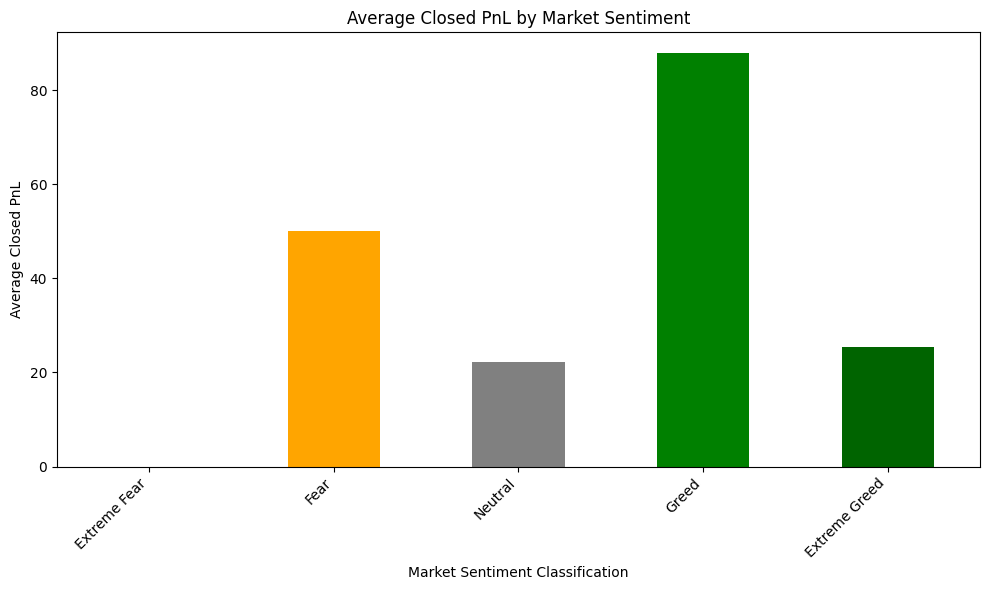

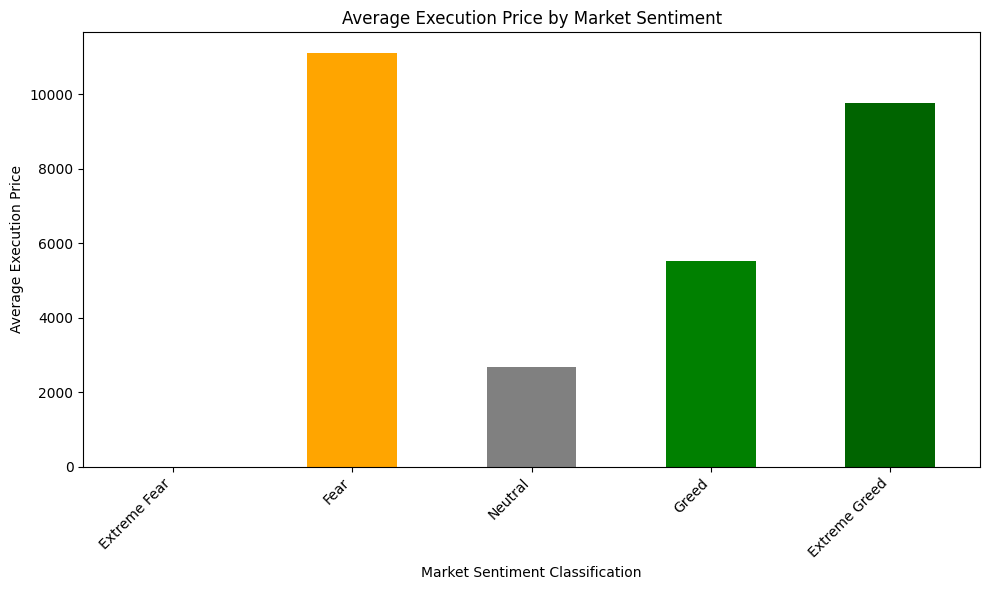

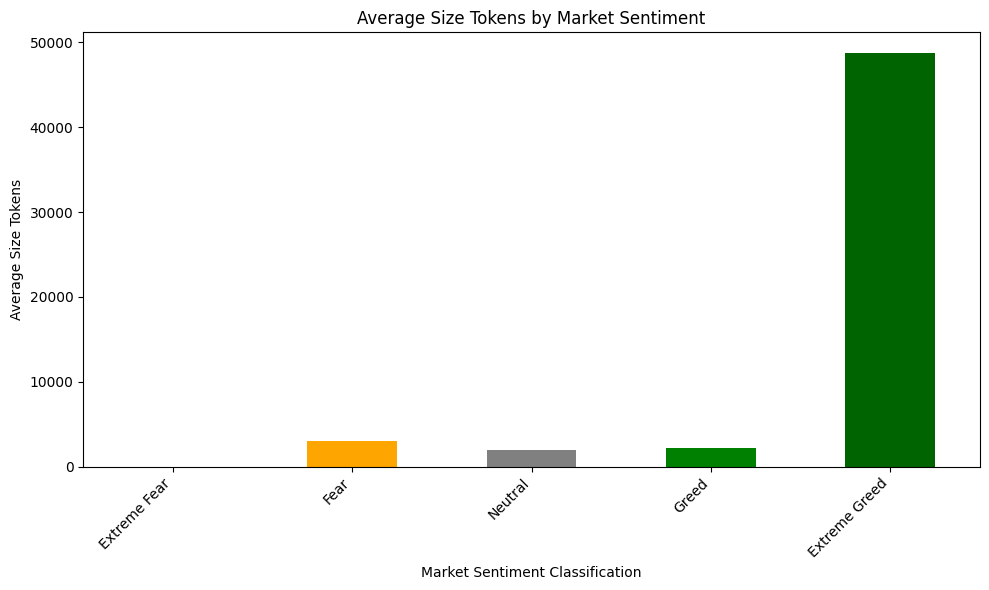

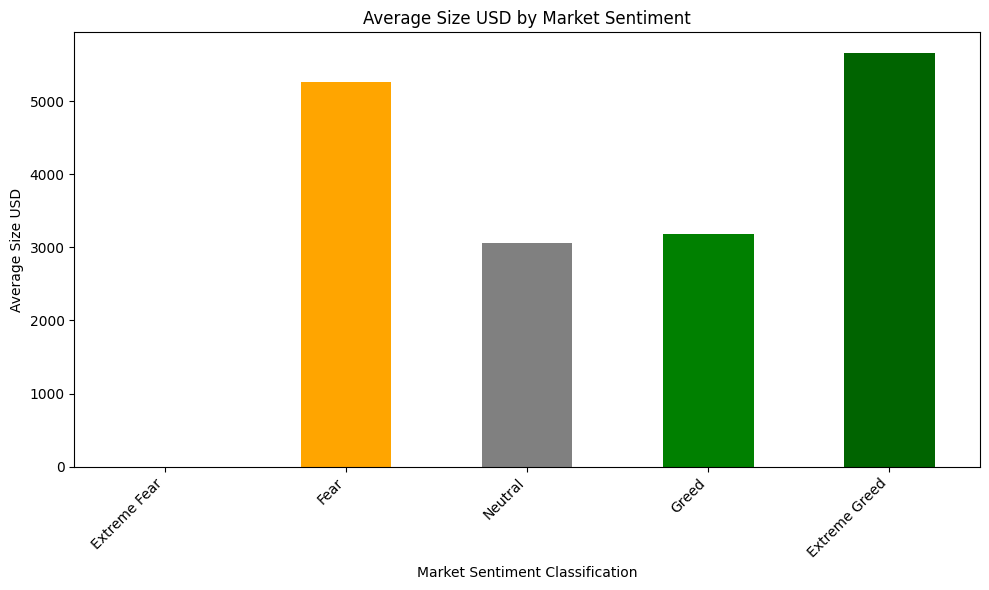

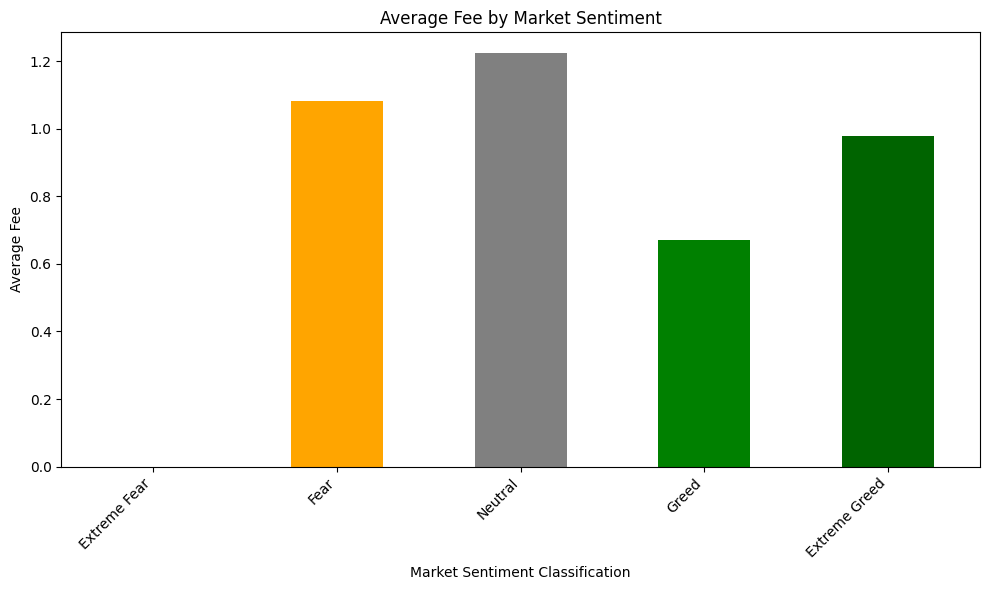

In [77]:
import matplotlib.pyplot as plt

performance_by_sentiment = performance_by_sentiment.reindex(['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])

metrics = ['Closed PnL', 'Execution Price', 'Size Tokens', 'Size USD', 'Fee']
y_labels = ['Average Closed PnL', 'Average Execution Price', 'Average Size Tokens', 'Average Size USD', 'Average Fee']

for metric, y_label in zip(metrics, y_labels):
    plt.figure(figsize=(10, 6))
    performance_by_sentiment[metric].plot(kind='bar', color=['red', 'orange', 'gray', 'green', 'darkgreen'])
    plt.title(f'Average {metric} by Market Sentiment')
    plt.xlabel('Market Sentiment Classification')
    plt.ylabel(y_label)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Analyze correlation

### Subtask:
Calculate the correlation matrix between numerical columns in the merged DataFrame to understand the linear relationships between trader performance metrics and the fear/greed index value.


**Reasoning**:
Select the relevant numerical columns and calculate the correlation matrix.



In [78]:
selected_columns = merged_df[['Closed PnL', 'Execution Price', 'Size Tokens', 'Size USD', 'Fee', 'value']]
correlation_matrix = selected_columns.corr()
display(correlation_matrix)

,Closed PnL,Execution Price,Size Tokens,Size USD,Fee,value
Closed PnL,1.000000,-0.007894,0.005037,0.136853,0.103585,0.011132
Execution Price,-0.007894,1.000000,-0.014741,0.194472,0.245514,-0.070793
Size Tokens,0.005037,-0.014741,1.000000,0.020852,0.010945,0.035295
Size USD,0.136853,0.194472,0.020852,1.000000,0.730400,-0.024110
Fee,0.103585,0.245514,0.010945,0.730400,1.000000,-0.028988
value,0.011132,-0.070793,0.035295,-0.024110,-0.028988,1.000000


## Visualize correlation

### Subtask:
Create a heatmap of the correlation matrix to visualize the relationships.


**Reasoning**:
Create a heatmap to visualize the correlation matrix with annotations and a title.



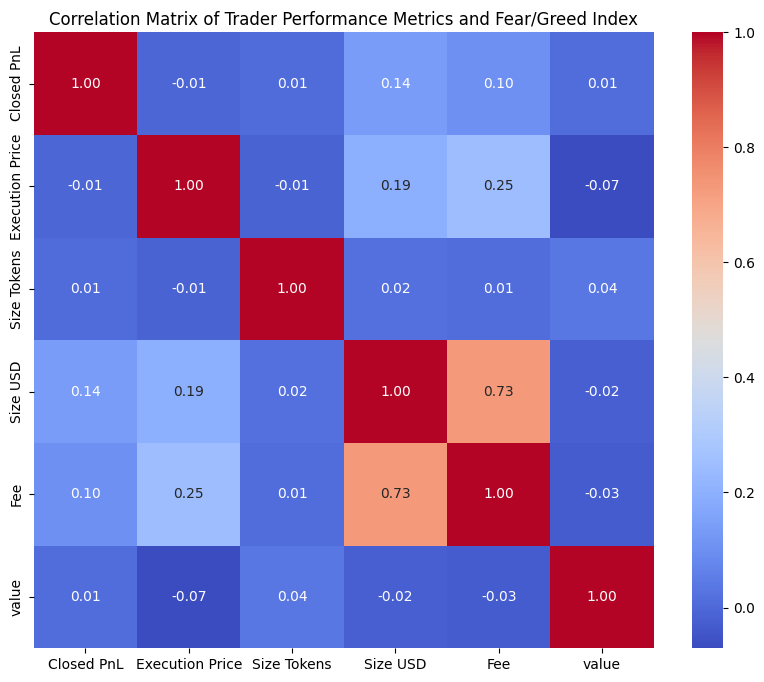

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Trader Performance Metrics and Fear/Greed Index')
plt.show()

## Interpret findings

### Subtask:
Summarize the key insights from the analysis and visualizations, explaining the relationship between market sentiment and trader performance and discussing any hidden patterns found.


## Summary:

### Data Analysis Key Findings

*   When grouped by market sentiment, "Greed" showed the highest average "Closed PnL", while "Extreme Greed" exhibited the highest average "Size Tokens" and "Size USD".
*   The correlation analysis revealed weak linear relationships between most trader performance metrics and the Fear/Greed Index value. Specifically, "Closed PnL" had a very low positive correlation (0.011132) with the index value, and "Execution Price" showed a weak negative correlation (-0.070793).

### Insights or Next Steps

*   While average performance differs by sentiment, the weak linear correlation suggests that the Fear/Greed Index value itself may not be a strong direct predictor of individual trade outcomes. Further non-linear relationship analysis might be beneficial.
*   Investigate other factors potentially influencing trader performance, such as trading strategy type, time of day, or specific market events, in conjunction with market sentiment.
